In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  4 15:25:04 2019

@author: liuth
"""

import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\\liuth\\Documents\\Python Scripts\\ThinkfulProjects\\Data')

In [2]:
#Dataframe from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#
#Loading\Exploring Data
dataset_1_path = 'amazon_cells_labelled.txt'
data_raw = pd.read_csv(dataset_1_path, delimiter="\t", header=None)
data_raw.columns = ['Comment', 'Score']
data_raw.head(3)

,Comment,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [31]:
print(data_raw)

                                               Comment  Score  good  great  \
0    So there is no way for me to plug it in here i...      0     0      0   
1                          Good case, Excellent value.      1     0      0   
2                               Great for the jawbone.      1     0      0   
3    Tied to charger for conversations lasting more...      0     0      0   
4                                    The mic is great.      1     0      0   
5    I have to jiggle the plug to get it to line up...      0     0      0   
6    If you have several dozen or several hundred c...      0     0      0   
7          If you are Razr owner...you must have this!      1     0      0   
8                  Needless to say, I wasted my money.      0     0      0   
9                     What a waste of money and time!.      0     0      0   
10                     And the sound quality is great.      1     0      0   
11   He was very impressed when going from the orig...      1   

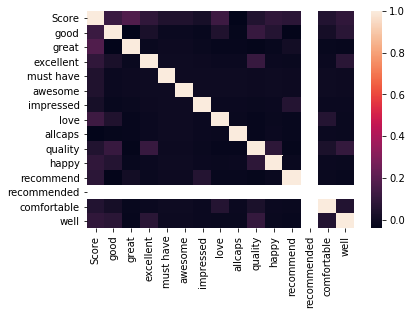

In [15]:
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love', 'quality', 'happy', 'recommend', 'recommended', 'comfortable',\
            'well']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords]
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())

In [16]:
#Input comparison
data = data_raw[keywords]
target = data_raw['Score']

#Naive Bayes Model
bnb = BernoulliNB()
bnb.fit (data, target)
#Classification of the model
y_pred = bnb.predict(data)

#Printed Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 385


In [17]:
#Confusion Matrix
confusion_matrix(target, y_pred)

#Cross Validate
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.615
Testing on Sample: 0.615


array([0.66, 0.58, 0.62, 0.62, 0.61, 0.6 , 0.63, 0.59, 0.61, 0.58])

---

Iterate Feature #2

C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


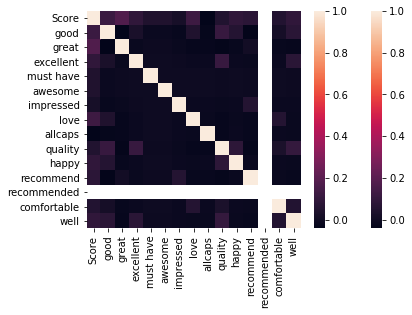

In [18]:
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love', 'quality', 'happy', 'recommend', 'recommended', 'comfortable',\
            'well']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
data_raw['allcaps'] = data_raw.Comment.str.isupper()
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords]
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
data_raw['allcaps'] = data_raw.Comment.str.isupper()
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords] + data_raw['allcaps']
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())

In [8]:
#Input comparison
data = data_raw[keywords]
target = data_raw['Score']

#Naive Bayes Model
bnb = BernoulliNB()
bnb.fit (data, target)
#Classification of the model
y_pred = bnb.predict(data)

#Printed Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 416


In [9]:
#Confusion Matrix
confusion_matrix(target, y_pred)

#Cross Validate
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.57
Testing on Sample: 0.584


array([0.6 , 0.59, 0.6 , 0.58, 0.56, 0.6 , 0.59, 0.55, 0.59, 0.54])

---

Iterate Feature #3

C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


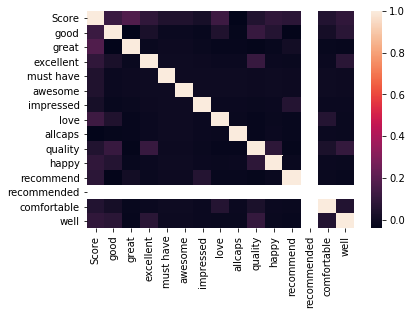

In [11]:
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love', 'quality', 'happy', 'recommend', 'recommended', 'comfortable',\
            'well']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
data_raw['allcaps'] = data_raw.Comment.str.isupper()
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords] + data_raw['allcaps']
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())

In [12]:
#Input comparison
data = data_raw[keywords]
target = data_raw['Score']

#Naive Bayes Model
bnb = BernoulliNB()
bnb.fit (data, target)
#Classification of the model
y_pred = bnb.predict(data)

#Printed Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 385


In [13]:
#Confusion Matrix
confusion_matrix(target, y_pred)

#Cross Validate
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.615
Testing on Sample: 0.615


array([0.66, 0.58, 0.62, 0.62, 0.61, 0.6 , 0.63, 0.59, 0.61, 0.58])

---

Iterate feature #4

C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


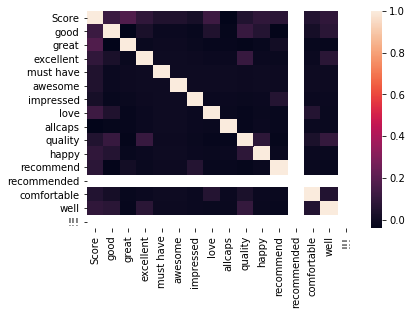

In [23]:
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love', 'quality', 'happy', 'recommend', 'recommended', 'comfortable',\
            'well', '!!!']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
data_raw['allcaps'] = data_raw.Comment.str.isupper()
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords] + data_raw['allcaps']
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())

In [24]:
#Input comparison
data = data_raw[keywords]
target = data_raw['Score']

#Naive Bayes Model
bnb = BernoulliNB()
bnb.fit (data, target)
#Classification of the model
y_pred = bnb.predict(data)

#Printed Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 385


In [25]:
#Confusion Matrix
confusion_matrix(target, y_pred)

#Cross Validate
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.615
Testing on Sample: 0.615


array([0.66, 0.58, 0.62, 0.62, 0.61, 0.6 , 0.63, 0.59, 0.61, 0.58])

---

Iteration Feature #4

C:\Users\liuth\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


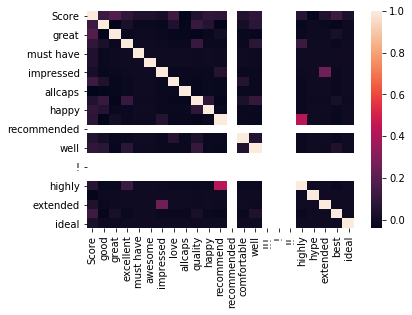

In [39]:
#Building features
keywords = ['good', 'great', 'excellent', 'must have', 'awesome', 'impressed',\
            'love', 'quality', 'happy', 'recommend', 'recommended', 'comfortable',\
            'well', 'highly', 'hype', 'extended', 'ideal',\
           'best']

for key in keywords:
     data_raw[str(key)] = data_raw.Comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ).astype(int)

#Adding additional features
data_raw['allcaps'] = data_raw.Comment.str.isupper()
# data_raw['Score'] = (data_raw['Score'] == 'Score')
data = data_raw[keywords] + data_raw['allcaps']
target = data_raw['Score']

data_raw.head(3)

#Heatmap
sns.heatmap(data_raw.corr())

In [37]:
#Input comparison
data = data_raw[keywords]
target = data_raw['Score']

#Naive Bayes Model
bnb = BernoulliNB()
bnb.fit (data, target)
#Classification of the model
y_pred = bnb.predict(data)

#Printed Results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 371


In [38]:
#Confusion Matrix
confusion_matrix(target, y_pred)

#Cross Validate
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,\
                                                    random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.635
Testing on Sample: 0.629


array([0.67, 0.58, 0.64, 0.63, 0.63, 0.59, 0.63, 0.64, 0.63, 0.59])

---

It seems that the more keywords classifier that I put in in regards to words, not punctuation, seems to make the model more accurate.  The problem is that when looking at the cross validation score they do not change meaning that I was not in overfitting territory.  The issue is that when I input more words into the keyword classifier it enters into overfitting territory.